In [88]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [89]:
rat_data = "clean_csv/final_rat_sightings.csv"
rat_sightings = pd.read_csv(rat_data)
rat_sightings["Sighting Year Month"] = pd.to_datetime(rat_sightings["Sighting Date"]).dt.to_period('M')
rat_sightings.head()

,Unnamed: 0,Incident ID,Sighting Date,Complaint Type,Incident,Location Type,Incident Zip,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Sighting Year Month
0,0,31464015,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006,Manhattan,980656.0,197137.0,40.707772,-74.012963,2015-09
1,1,31464024,2015-09-04,Rodent,Rat Sighting,Commercial Building,10306,Staten Island,955207.0,148858.0,40.575209,-74.104547,2015-09
2,2,31464025,2015-09-04,Rodent,Rat Sighting,1-2 Family Dwelling,10310,Staten Island,949033.0,169278.0,40.631236,-74.126878,2015-09
3,3,31464026,2015-09-04,Rodent,Rat Sighting,3+ Family Apt. Building,11206,Brooklyn,1000550.0,197585.0,40.708987,-73.941207,2015-09
4,4,31464027,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462,Bronx,1021648.0,250489.0,40.854130,-73.864813,2015-09


In [90]:
sight_count = rat_sightings.groupby(["Sighting Year Month"]).count()["Incident ID"]
sight_count.index=sight_count.index.to_series().astype(str)

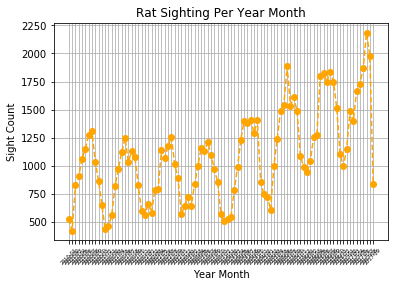

In [91]:
plt.plot(sight_count.index, sight_count,'o--', c="orange")
plt.title("Rat Sighting Per Year Month")
plt.ylabel("Sight Count")
plt.xlabel("Year Month")
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=5)
plt.grid(True)
plt.show()

In [92]:
from scipy import stats
y = sight_count.values
x = np.arange(93)

In [93]:
stats.linregress(x, y)

LinregressResult(slope=9.035555489242338, intercept=672.1601464195836, rvalue=0.6018385404044592, pvalue=1.7648990217283327e-10, stderr=1.2568780587277346)

In [94]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [95]:
lin_reg_y = (slope * x) + intercept

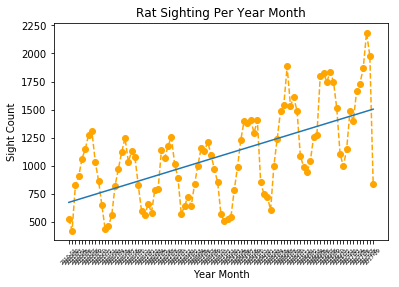

In [100]:
f, ax = plt.subplots()
ax.plot(sight_count.index, sight_count,'o--', c="orange")
ax.plot(sight_count.index, lin_reg_y)

plt.title("Rat Sighting Per Year Month")
plt.ylabel("Sight Count")
plt.xlabel("Year Month")

plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=5)

plt.show()